<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Salma ElSayed

GUC-ID:43-6801

Elective Tutorial No.: T4

**Member 2**

Name: Ali Elbadry

GUC-ID: 43-6833

Elective Tutorial No.: T2

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [12]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Create Classes

$ w = S𝑊^{−1}(m_2 − m_1)$


$ w_0 = -w^T \frac{(m_1 + m_2)}{2} $

In [13]:
class FLD:
    def __init__(self, feature_size):
        self.feature_size=feature_size
        self.weights=np.zeros(feature_size)
        self.bias=0
    def fit(self, x, t):
        print("fitting... ")
        x1, x2=self.split_classes(x,t)
        m1=np.mean(x1, axis=0)
        print(m1)
        m2=np.mean(x2,axis=0)
        Sw = self.calc_SW(x1,m1,x2,m2)
        self.weights= self.calc_weights(Sw, m1, m2)
        self.calc_bias(m1, m2)
        return 
    
    
    def split_classes(self, x, t):
        mask1=(t==1)
        mask2=(t==-1)
        c1=x[mask1]
        c2=x[mask2]
        return c1, c2
        


    def calc_weights(self, Sw, m1,m2):
        invSw=np.linalg.pinv(Sw)
        mdiff=m1-m2
        w =np.matmul(invSw,mdiff)
        print("calculating weights...")
        return w

    def calc_SW(self, x1, m1, x2, m2):
        print('calculating sw...')
        set1 = x1-m1
        set2 = x2-m2
        term1=np.zeros((self.feature_size,self.feature_size))
        term2=np.zeros((self.feature_size,self.feature_size))
        for a in set1:
            term1+=np.multiply((a),np.transpose(np.array([a])))
        for b in set2:
            term2+=np.multiply((b),np.transpose(np.array([b])))
        return term1+term2

        
    def calc_bias(self, m1, m2):
        print('calculating bias...')
        self.bias = -1*np.dot(self.weights, 0.5*np.add(m1,m2))

    def predict(self, x):
        return np.dot(self.weights, x) + self.bias

In [14]:
class classifier:
    
    def __init__(self, airplane, automobile, frog):
        self.airplaneClassifier = airplane
        self.automobileClassifier = automobile
        self.frogClassifier = frog
    
    def predict(self,datapoint):
        y_airplane = self.airplaneClassifier.predict(datapoint)
        y_automobile = self.automobileClassifier.predict(datapoint)
        y_frog = self.frogClassifier.predict(datapoint)
        if(y_airplane>=y_automobile and y_airplane>=y_frog):
            return np.array([1,0,0])
        if(y_automobile>y_airplane and y_automobile>=y_frog):
            return np.array([0,1,0])
        else:
            return np.array([0,0,1])

## Read Data (Edit)

In [4]:
from google.colab import files
uploaded = files.upload()
!unzip Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/frog/0.jpg   
  inflating: Data/train/frog/1.jpg   
  inflating: Data/train/frog/10.jpg  
  inflating: Data/train/frog/100.jpg  
  inflating: Data/train/frog/1000.jpg  
  inflating: Data/train/frog/1001.jpg  
  inflating: Data/train/frog/1002.jpg  
  inflating: Data/train/frog/1003.jpg  
  inflating: Data/train/frog/1004.jpg  
  inflating: Data/train/frog/1005.jpg  
  inflating: Data/train/frog/1006.jpg  
  inflating: Data/train/frog/1007.jpg  
  inflating: Data/train/frog/1008.jpg  
  inflating: Data/train/frog/1009.jpg  
  inflating: Data/train/frog/101.jpg  
  inflating: Data/train/frog/1010.jpg  
  inflating: Data/train/frog/1011.jpg  
  inflating: Data/train/frog/1012.jpg  
  inflating: Data/train/frog/1013.jpg  
  inflating: Data/train/frog/1014.jpg  
  inflating: Data/train/frog/1015.jpg  
  inflating: Data/train/frog/1016.jpg  
  inflating: Data/train/frog/1017.jpg  
  inflating: Data/train/frog/1018.jpg

In [15]:
def read_train_rgb(name):
    #train_path = '/content/Data/train/'
    train_path = 'Data/train/'
    data = np.array([plt.imread(train_path+name+'/{}.jpg'.format(i)) for i in np.arange(0,5000)])
    data=data.reshape(-1,3072)
    data=data/255
    return data
def read_test_rgb(name):
    #train_path = '/content/Data/train/'
    test_path = 'Data/test/'
    data = np.array([plt.imread(test_path+name+'/{}.jpg'.format(i)) for i in np.arange(0,1000)])
    data=data.reshape(-1,3072)
    data=data/255
    return data
def create_labels(order):
    pos= np.ones(5000)
    neg =np.ones(5000)*-1
    if (order==0):
        labels = np.concatenate((pos,neg,neg))
    if order==1:
        labels = np.concatenate((neg,pos,neg))
    if order==2:
        labels = np.concatenate((neg,neg,pos))
    return labels

In [16]:
airplane_train = read_train_rgb('airplane')
automobile_train = read_train_rgb('automobile')
frog_train = read_train_rgb('frog')


In [17]:
airplane_test= read_test_rgb('airplane')
automobile_test= read_test_rgb('automobile')
frog_test= read_test_rgb('frog')


In [18]:
airplane_t=create_labels(0)
automobile_t=create_labels(1)
frog_t=create_labels(2)

In [19]:
# return (x_train, y_train), (x_test, y_test)
x_train = np.concatenate((airplane_train,automobile_train,frog_train))
x_test=np.concatenate((airplane_test,automobile_test,frog_test))



<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [20]:
airplane_model=FLD(3072)
automobile_model=FLD(3072)
frog_model=FLD(3072)

In [21]:
airplane_model.fit(x_train,airplane_t)

fitting... 
[0.56773333 0.63197647 0.6978298  ... 0.50846745 0.53315451 0.53987922]
calculating sw...
calculating weights...
calculating bias...


In [22]:
automobile_model.fit(x_train,automobile_t)

fitting... 
[0.53522745 0.54109098 0.53099373 ... 0.52409098 0.51506039 0.49479216]
calculating sw...
calculating weights...
calculating bias...


In [23]:
frog_model.fit(x_train,frog_t)

fitting... 
[0.45160784 0.44540706 0.36726275 ... 0.49941804 0.4800149  0.39808706]
calculating sw...
calculating weights...
calculating bias...


In [24]:
clf= classifier(airplane_model,automobile_model,frog_model)

In [25]:
airplane_preds=[]
for im in airplane_test:
    pred =clf.predict(im)
    airplane_preds.append(pred.argmax())
np.bincount(airplane_preds)

array([760, 144,  96])

In [26]:
automobile_preds=[]
for im in automobile_test:
    pred =clf.predict(im)
    automobile_preds.append(pred.argmax())
np.bincount(automobile_preds)

array([201, 654, 145])

In [27]:
frog_preds=[]
for im in frog_test:
    pred =clf.predict(im)
    frog_preds.append(pred.argmax())
np.bincount(frog_preds)

array([ 78, 134, 788])

In [28]:
confusion_matrix=[]
confusion_matrix.append(np.bincount(airplane_preds))
confusion_matrix.append(np.bincount(automobile_preds))
confusion_matrix.append(np.bincount(frog_preds))
confusion_matrix=np.array(confusion_matrix)

## Confusion Matrix (Don't Edit)

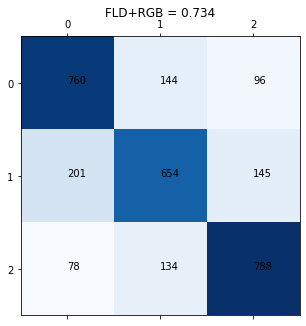

In [29]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/x_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [30]:
# convert to gray scale 
def convertToGrayScale(image_array): #function to do the actual RGB to gray scale converting 
    gray_scale_image_array = np.array(np.zeros(1024)) #initialize empty 1D array to represent gray image
  #convert from RGB to gray scale
    for i in range(1024):
        #Igray(p)= 0.3IR(p) + 0.59IG(p) + 0.11IB(p)
            iGray = 0.3*image_array[3*i] + 0.59*image_array[3*i+1] + 0.11*image_array[3*i+2]
        #store new intensity in gray scale image
            gray_scale_image_array[i] = iGray
    return gray_scale_image_array

#prepare grayscale data
airplaneGreyTrain = []
automobileGreyTrain = []
frogGreyTrain = []

for i in range(0,5000):
  #convert airplane image
    gray_scale_image_array = convertToGrayScale(airplane_train[i])
    airplaneGreyTrain.append(gray_scale_image_array)
  #convert automobile image
    gray_scale_image_array = convertToGrayScale(automobile_train[i])
    automobileGreyTrain.append(gray_scale_image_array)
  #convert frog image
    gray_scale_image_array = convertToGrayScale(frog_train[i])
    frogGreyTrain.append(gray_scale_image_array)

airplaneGreyTrainData = np.array(airplaneGreyTrain)
automobileGreyTrainData = np.array(automobileGreyTrain)
frogGreyTrainData = np.array(frogGreyTrain)

airplaneGreyTest = []
automobileGreyTest = []
frogGreyTest = []

for i in range(0,1000):
  #convert airplane image
    gray_scale_image_array = convertToGrayScale(airplane_test[i])
    airplaneGreyTest.append(gray_scale_image_array)
  #convert automobile image
    gray_scale_image_array = convertToGrayScale(automobile_test[i])
    automobileGreyTest.append(gray_scale_image_array)
  #convert frog image
    gray_scale_image_array = convertToGrayScale(frog_test[i])
    frogGreyTest.append(gray_scale_image_array)

#convert list to array
airplaneGreyTestData = np.array(airplaneGreyTest)
automobileGreyTestData = np.array(automobileGreyTest)
frogGreyTestData = np.array(frogGreyTest)

# Train
airplaneclassifier=FLD(1024) #classifier to classify airplane images
X_train = np.concatenate((airplaneGreyTrainData, automobileGreyTrainData, frogGreyTrainData)) #prepare train set input
X_test = np.concatenate((airplaneGreyTestData, automobileGreyTestData, frogGreyTestData)) #prepare train set labels
y_train = np.concatenate((np.ones(5000), -1*np.ones(5000), -1*np.ones(5000))) #prepare test set input
y_test = np.concatenate((np.ones(1000), -1*np.ones(1000), -1*np.ones(1000))) #prepare test set labels
airplaneclassifier.fit(X_train, y_train) #training the airplane model

automobileclassifier=FLD(1024) #classifier to classify airplane images
X_train = np.concatenate((airplaneGreyTrainData, automobileGreyTrainData, frogGreyTrainData)) #prepare train set input
X_test = np.concatenate((airplaneGreyTestData, automobileGreyTestData, frogGreyTestData)) #prepare train set labels
y_train = np.concatenate((-1*np.ones(5000), np.ones(5000), -1*np.ones(5000))) #prepare test set input
y_test = np.concatenate((-1*np.ones(1000), np.ones(1000), -1*np.ones(1000))) #prepare test set labels
automobileclassifier.fit(X_train, y_train) #training the automobile model

frogclassifier=FLD(1024) #classifier to classify airplane images
X_train = np.concatenate((airplaneGreyTrainData, automobileGreyTrainData, frogGreyTrainData)) #prepare train set input
X_test = np.concatenate((airplaneGreyTestData, automobileGreyTestData, frogGreyTestData)) #prepare train set labels
y_train = np.concatenate((-1*np.ones(5000), -1*np.ones(5000), np.ones(5000))) #prepare test set input
y_test = np.concatenate((-1*np.ones(1000), -1*np.ones(1000), np.ones(1000))) #prepare test set labels
frogclassifier.fit(X_train, y_train) #training the frog model

# Test
classifier = classifier(airplaneclassifier, automobileclassifier, frogclassifier) #wrapper class encompassing the three classifiers
c1=np.array(np.zeros(3)) #initializing first row of confusion matrix
for datapoint in airplaneGreyTest:
    y_pred = classifier.predict(datapoint)#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        c1[0] = c1[0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        c1[1] = c1[1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        c1[2] = c1[2] + 1 #point classified into class 2 

c2=np.array(np.zeros(3)) #initializing second row of confusion matrix
for datapoint in automobileGreyTest:
    y_pred = classifier.predict(datapoint) #predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        c2[0] = c2[0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        c2[1] = c2[1] + 1 #point classified into class 1
    elif(y_pred[2]==1):
        c2[2] = c2[2] + 1 #point classified into class 2

c3=np.array(np.zeros(3)) #initializing third row of confusion matrix
for datapoint in frogGreyTest:
    y_pred = classifier.predict(datapoint) #predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        c3[0] = c3[0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        c3[1] = c3[1] + 1 #point classified into class 1
    elif(y_pred[2]==1):
        c3[2] = c3[2] + 1 #point classified into class 2

# confusion_matrix = 
confusion_matrix = np.array([c1,c2,c3]) #combining the the three rows of the confusion matrix

fitting... 
[0.6199474  0.61772919 0.61869246 ... 0.52609261 0.52528128 0.52648811]
calculating sw...
calculating weights...
calculating bias...
fitting... 
[0.53822122 0.53753475 0.54146525 ... 0.50938983 0.51178087 0.51554006]
calculating sw...
calculating weights...
calculating bias...
fitting... 
[0.43867142 0.43521102 0.4361582  ... 0.478854   0.47713521 0.47682378]
calculating sw...
calculating weights...
calculating bias...


## Confusion Matrix (Don't Edit)

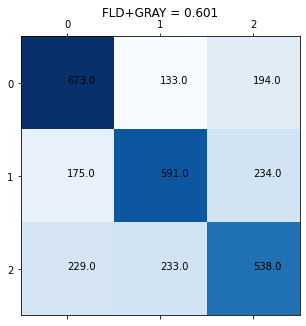

In [31]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

RGB  features gave higher accuracy than greyscale. The accuracy of classifying frogs dropped most significantly between the two cases. These differences can be attributed to the fact that when converting to greyscale, some information was lost since we have less features for the model to classify the image based on. The change was most significant in frogs probably due to the fact that amongst the three classes, it had the most consistent colour palette. Most frog pictures are dominantly green or yellow while the two other classes vary greatly in colours so by removing colour information, we lost the most distinctive and consistent feature for the frog class.


##########
<hr style="border:2px solid black"> </hr>